<a href="https://colab.research.google.com/github/tontantip/DADS7102_Applied_Optimization-Predictive_Analytics/blob/main/Code_HW2_Opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework2
นายต้นตาล ทิพย์คุณ 6720422016

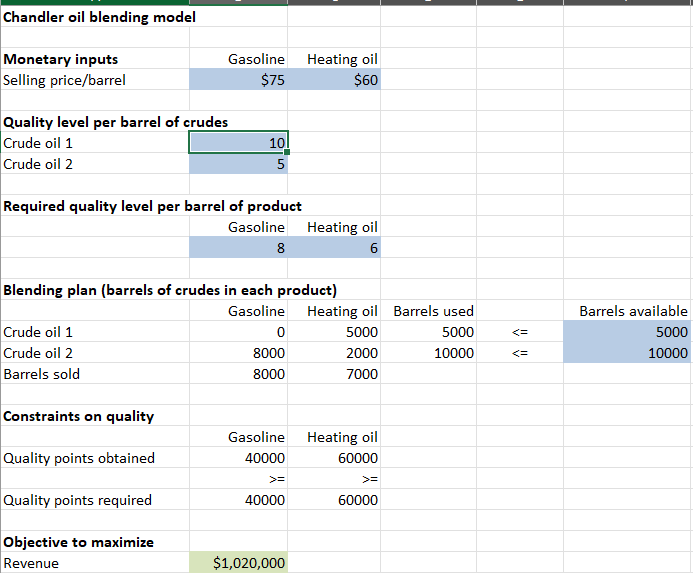

### AMPL Python API

In [ ]:
# AMPL Python API
%pip install -q amplpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 23.7 MB/s eta 0:00:00


In [ ]:
from amplpy import AMPL, ampl_notebook

ampl = ampl_notebook(
    modules=["coin", "highs", "gokestrel", "gurobi"],  # modules to install
    license_uuid="your-license-uuid",  # license to use
)  # instantiate AMPL object and register magics

In [ ]:
# NLP: Chance constraint

%%ampl_eval

reset;
var x11 >= 0;
var x21 >= 0;
var x12 >= 0;
var x22 >= 0;

maximize objective: 75*(x11+x21)+ 60*(x12+x22);

s.t. input_crude1: x11 + x12 <= 5000;
s.t. input_crude2: x21 + x22 <= 10000;
s.t. q_gas: (10*x11)+(5*x21) >= 8*(x11 + x21);
s.t. q_he: (10*x12)+(5*x22) >= 6*(x12 + x22);


In [ ]:
ampl.option["solver"] = "gurobi"
ampl.solve()
ampl.get_data("x11", "x21", "x12", "x22").to_pandas()

Gurobi 13.0.0: Gurobi 13.0.0: optimal solution; objective 975000
2 simplex iterations


,x11,x21,x12,x22
0,3000,2000,2000,8000
